In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import warnings
warnings.filterwarnings('ignore')
np.random.seed(23)

In [2]:
df = pd.read_pickle("processed_data.pkl")
df.describe()

,Sentiment_Score_nltk,Comment_Length,Sentiment_num
count,17874.000000,17874.000000,17874.000000
mean,0.391501,177.705214,0.488811
std,0.476521,252.135479,0.713556
min,-0.997300,2.000000,-1.000000
25%,0.000000,66.000000,0.000000
50%,0.510600,113.000000,1.000000
75%,0.806150,201.000000,1.000000
max,0.999800,7847.000000,1.000000


# Rozkład zmiennej "Sentiment"

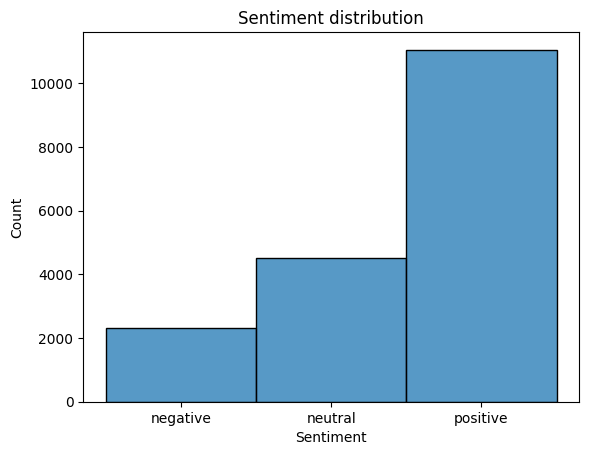

In [3]:

sentiment_order = ["negative", "neutral", "positive"]
df['Sentiment'] = pd.Categorical(df['Sentiment'], categories=sentiment_order, ordered=True)
sentiments = sns.histplot(df['Sentiment'])
sentiments.set_title("Sentiment distribution")
plt.show()

# Rozkład zmiennej "Comment"

<Axes: xlabel='Comment_Length', ylabel='Count'>

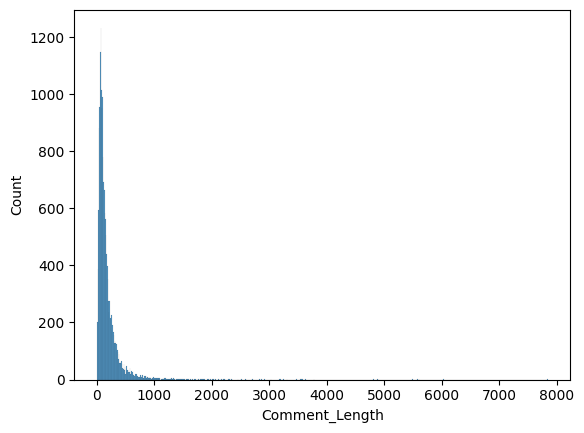

In [4]:
sns.histplot(df['Comment_Length'])

In [5]:
df['Comment_Length'].describe()

count    17874.000000
mean       177.705214
std        252.135479
min          2.000000
25%         66.000000
50%        113.000000
75%        201.000000
max       7847.000000
Name: Comment_Length, dtype: float64

In [6]:
df['Comment_Length']

0        317
1        163
2        183
3        450
4        135
        ... 
18403    277
18404    118
18405    244
18406     88
18407    404
Name: Comment_Length, Length: 17874, dtype: int64

In [7]:
df.sort_values(by="Comment_Length", ascending = True)

,Comment,Sentiment,Sentiment_Score_nltk,Starts_with_i,Comment_Length,Sentiment_num
11631,哈哈,neutral,0.0000,False,2,0
16473,jó,neutral,0.0000,False,2,0
10520,bye,neutral,0.0000,False,3,0
11112,wow,positive,0.5859,False,3,1
10926,6th,positive,0.0000,False,3,1
...,...,...,...,...,...,...
11370,i found this very interesting and as someone w...,positive,0.9972,True,5487,1
10493,tracklist 0000 kanisan ft wishes and dreams m...,neutral,0.9967,False,5586,0
18276,000000 00 introduction to the video speaker ml...,neutral,0.9957,False,5597,0
16407,description of exclusive video footage 110 pan...,neutral,-0.0642,False,6031,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17874 entries, 0 to 18407
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Comment               17874 non-null  object  
 1   Sentiment             17874 non-null  category
 2   Sentiment_Score_nltk  17874 non-null  float64 
 3   Starts_with_i         17874 non-null  bool    
 4   Comment_Length        17874 non-null  int64   
 5   Sentiment_num         17874 non-null  int64   
dtypes: bool(1), category(1), float64(1), int64(2), object(1)
memory usage: 733.2+ KB


In [9]:
bins = [0, df['Comment_Length'].quantile(0.25), df['Comment_Length'].quantile(0.5), df['Comment_Length'].quantile(0.75), df['Comment_Length'].max()]
labels = ['short', 'medium', 'long', 'very long']
df['Comment_Length_Binned'] = pd.cut(df['Comment_Length'],bins = bins, labels = labels, right = False)

In [20]:
print([0, df['Comment_Length'].quantile(0.25), df['Comment_Length'].quantile(0.5), df['Comment_Length'].quantile(0.75), df['Comment_Length'].max()])

[0, np.float64(66.0), np.float64(113.0), np.float64(201.0), np.int64(7847)]


<Axes: xlabel='Comment_Length_Binned', ylabel='Count'>

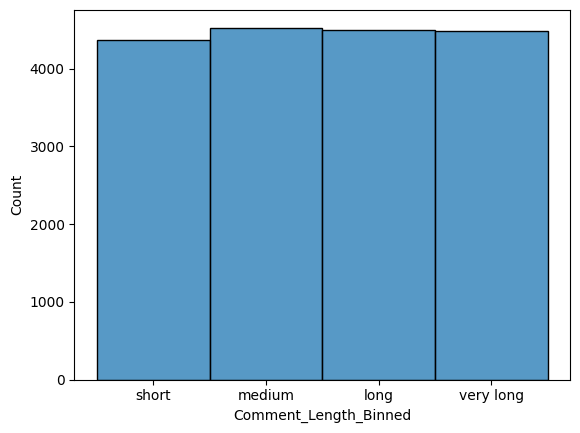

In [10]:
sns.histplot(df['Comment_Length_Binned'])

<Axes: xlabel='Comment_Length', ylabel='Count'>

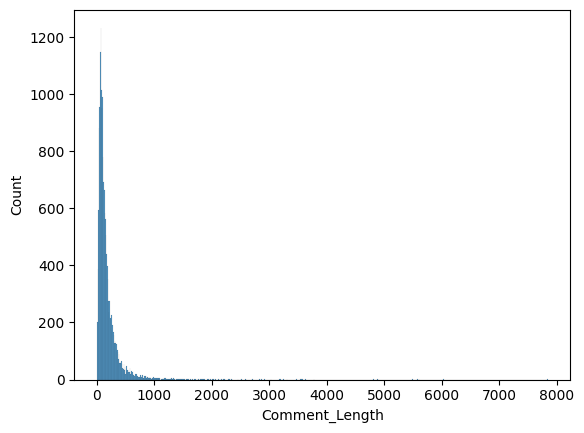

In [18]:
sns.histplot(df['Comment_Length'])

In [11]:
print(df.columns)  # See column names


Index(['Comment', 'Sentiment', 'Sentiment_Score_nltk', 'Starts_with_i',
       'Comment_Length', 'Sentiment_num', 'Comment_Length_Binned'],
      dtype='object')


<Axes: xlabel='Sentiment', ylabel='Count'>

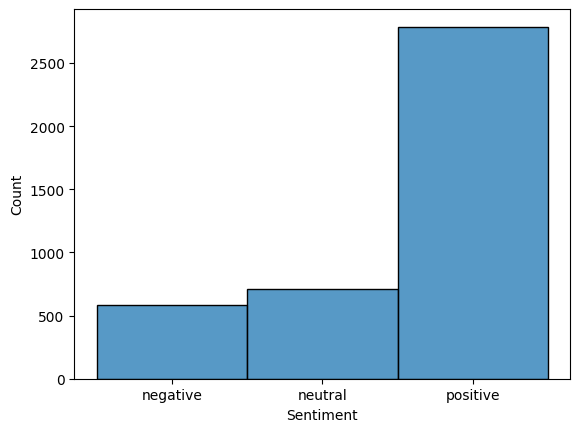

In [12]:
sentiment_order = ["negative", "neutral", "positive"]
df['Sentiment'] = pd.Categorical(df['Sentiment'], categories=sentiment_order, ordered=True)
sns.histplot(df[df["Starts_with_i"] == True]['Sentiment'])

## distributions for nltk score 0
If nltk score can't discriminate this bnig group of entries, what other features can we use?

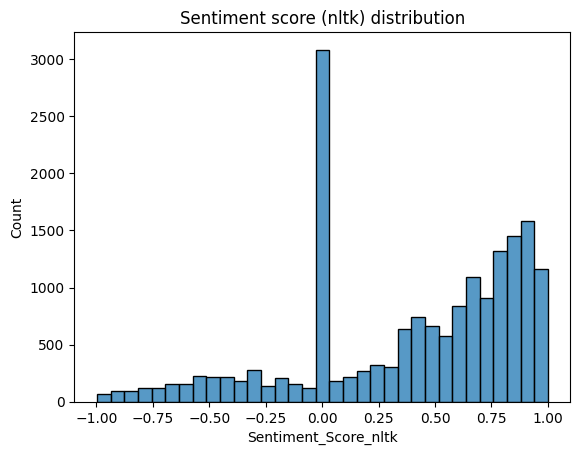

In [13]:
sentiments = sns.histplot(df['Sentiment_Score_nltk'])
sentiments.set_title("Sentiment score (nltk) distribution")
plt.show()

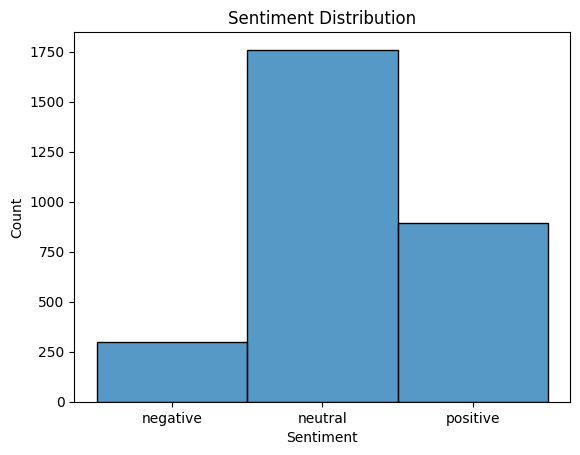

In [14]:
zero_score = df[df["Sentiment_Score_nltk"] == 0]
sentiment_order = ["negative", "neutral", "positive"]

# Make sure the Sentiment column has the correct order
zero_score['Sentiment'] = pd.Categorical(zero_score['Sentiment'], categories=sentiment_order, ordered=True)

# Plot histogram with custom order for sentiment
sentiments = sns.histplot(zero_score['Sentiment'], discrete=True)

# Set title and show the plot
sentiments.set_title("Sentiment Distribution")
plt.show()



<Axes: xlabel='Comment_Length_Binned', ylabel='Count'>

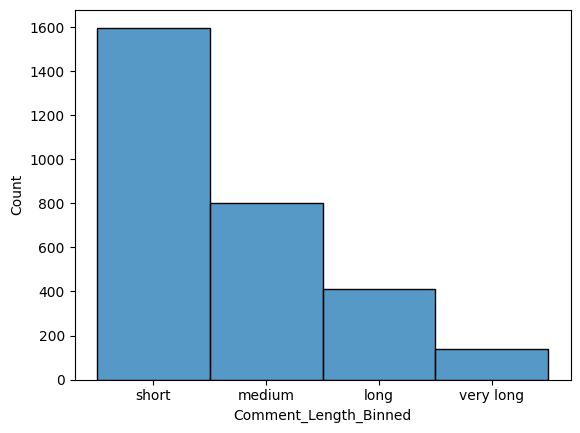

In [15]:
bins = [0, df['Comment_Length'].quantile(0.25), df['Comment_Length'].quantile(0.5), df['Comment_Length'].quantile(0.75), df['Comment_Length'].max()]
labels = ['short', 'medium', 'long', 'very long']
df['Comment_Length_Binned'] = pd.cut(zero_score['Comment_Length'],bins = bins, labels = labels, right = False)
sns.histplot(zero_score['Comment_Length_Binned'])


<Axes: xlabel='Comment_Length', ylabel='Count'>

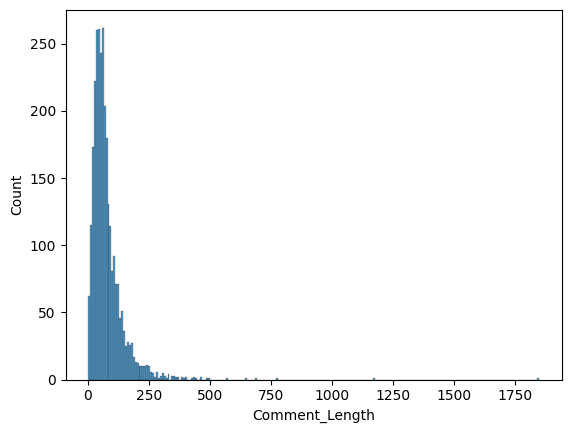

In [21]:
sns.histplot(zero_score['Comment_Length'])

## feature correlation matrix

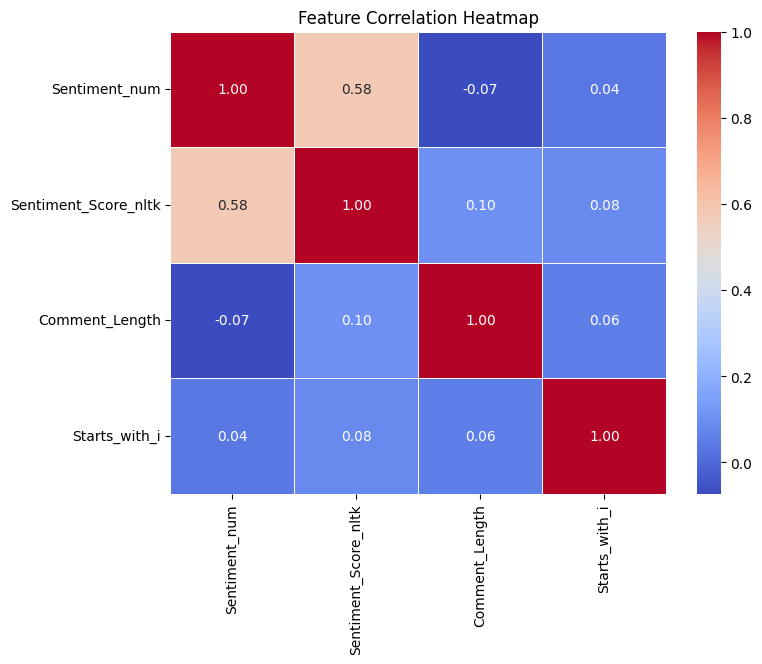

In [16]:

corr_matrix = df[["Sentiment_num", "Sentiment_Score_nltk", "Comment_Length", "Starts_with_i"]].corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

## nltk sentiment score vs labels in dataset

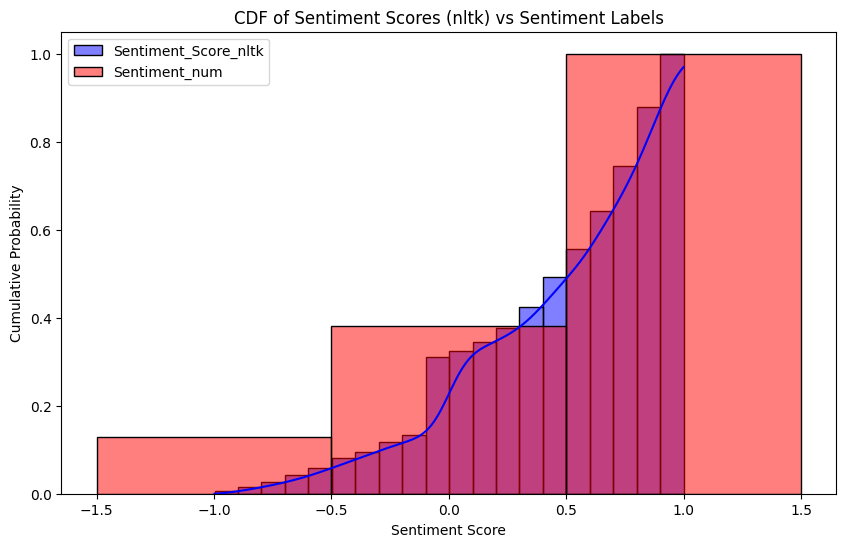

In [17]:
plt.figure(figsize=(10, 6))

# CDF for Sentiment_Score_nltk (continuous)
sns.histplot(df['Sentiment_Score_nltk'], bins=20, stat='density', cumulative=True, kde=True, color='blue', label='Sentiment_Score_nltk', alpha=0.5)

# CDF for Sentiment_num (discrete)
sns.histplot(df['Sentiment_num'], discrete=True, stat='density', cumulative=True, color='red', label='Sentiment_num', alpha=0.5)

# Labels and legend
plt.xlabel("Sentiment Score")
plt.ylabel("Cumulative Probability")
plt.title("CDF of Sentiment Scores (nltk) vs Sentiment Labels")
plt.legend()
plt.show()